# Phase 3 Project

![Telecomm Industry](./images/cessna_vs_piper.jpg)

## 1. Business Problem
[place holder for stakeholders & background info]

The business problem at hand is to predict customer churn for SyriaTel, a telecommunications company, in order to minimize revenue loss and enhance customer retention efforts. With customer attrition posing a significant challenge to profitability in the telecom industry, SyriaTel seeks to identify patterns and trends within its customer base that indicate potential churn. By leveraging historical data and predictive modeling techniques, the aim is to develop a classifier that can accurately forecast which customers are likely to discontinue their services, enabling SyriaTel to implement targeted retention strategies and ultimately strengthen its competitive position in the market.


The goal: Create a model to predict churn in telecom members contacting support. We are aiming to reduce the amount of cases in which members are mistakenly identified as retained (false negative) vs mistakenly identified as churned to ensure we capture all members who may churn (positive).

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel


## 2. Data Understanding

For this analysis, the SyriaTel churn data was sourced from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset contains data on the customers of a Telecom company. Each row represents a customer and the columns contain customer’s attributes which are described in the following:

- state: the state the user lives in
- account length: the number of days the user has this account
- area code: the code of the area the user lives in
- phone number: the phone number of the user
- international plan: true if the user has the international plan, otherwise false
- voice mail plan: true if the user has the voice mail plan, otherwise false
- number vmail messages: the number of voice mail messages the user has sent
- total day minutes: total number of minutes the user has been in calls during the day
- total day calls: total number of calls the user has done during the day
- total day charge: total amount of money the user was charged by the Telecom company for calls during the day
- total eve minutes: total number of minutes the user has been in calls during the evening
- total eve calls: total number of calls the user has done during the evening
- total eve charge: total amount of money the user was charged by the Telecom company for calls during the evening
- total night minutes: total number of minutes the user has been in calls during the night
- total night calls: total number of calls the user has done during the night
- total night charge: total amount of money the user was charged by the Telecom company for calls during the night
- total intl minutes: total number of minutes the user has been in international calls
- total intl calls: total number of international calls the user has done
- total intl charge: total amount of money the user was charged by the Telecom company for international calls
- customer service calls: number of customer service calls the user has done
- churn: true if the user terminated the contract, otherwise false

In [2]:
# load the dataset
df = pd.read_csv('data/churn_dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has no missingness and most columns are numeric. Will have to explore the object type columns to assess whether to drop or transform. With 3333 entries, the dataset is not small but not the largest, depending on the distribution of the target, may need to consider re-sampling.

Before getting into the data exploration, we will rename the columns with _ instead of spaces. We can also drop phone number right off the bat from the dataset as this is not something we can use to determine churn. It is a un

In [4]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

# Drop the phone number column.
# df.drop('phone_number', axis=1, inplace=True)
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

## 3. Data Exploration

### Target Variable: Churn
- Of the 3,333 customers in this dataset, 483 terminated their contract with SyriaTel.
- This is an imbalanced dataset, with 14.5% of customers lost. We will need to address this before modeling in our preprocessing.
- we will also label encode this variable to change it from a bool to a numeric value.

False    2850
True      483
Name: churn, dtype: int64

False    0.855086
True     0.144914
Name: churn, dtype: float64


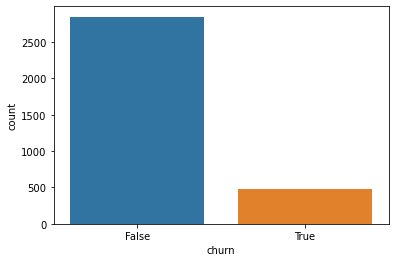

In [5]:
# Churn
print(df.churn.value_counts())
print()
print(df.churn.value_counts(normalize=True))
sns.countplot(data=df, x='churn', );

In [6]:
#Perfoming label encoding
#False becomes 0 and True becomes 1
encoder = LabelEncoder()
df['churn'] = encoder.fit_transform(df['churn'])
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### Categorical Columns

In [7]:
df.select_dtypes('object')

,state,phone_number,international_plan,voice_mail_plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


#### `phone_number`

We can drop phone number right off the bat from the dataset as this is not something we can use to determine churn. There are no duplicate entries, thus every row is unqiue and this variable is similar to an index.

In [8]:
print(df['phone_number'].value_counts())
df.drop('phone_number', axis=1, inplace=True)

353-6056    1
391-6260    1
384-6132    1
336-4960    1
398-4814    1
           ..
421-8535    1
418-8969    1
336-1749    1
348-6057    1
327-9341    1
Name: phone_number, Length: 3333, dtype: int64


#### `state`

This is a nominal categorical variable and can be transformed to numeric by using methods like one-hot encoding or label encoding, depending on the specific requirements of the machine learning algorithm being used. We might even consider mapping states to their respective time zones to reduce the number of variables.

In [9]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
MT     68
NJ     68
NV     66
CO     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [10]:
# # Assuming df is your DataFrame containing the state column
# state_timezone_mapping = {
#     'CT': 'EST', 'DE': 'EST', 'FL': 'EST', 'GA': 'EST', 'IN': 'EST', 'KY': 'EST', 'MA': 'EST',
#     'MD': 'EST', 'ME': 'EST', 'MI': 'EST', 'NC': 'EST', 'NH': 'EST', 'NJ': 'EST', 'NY': 'EST',
#     'OH': 'EST', 'PA': 'EST', 'RI': 'EST', 'SC': 'EST', 'TN': 'EST', 'VA': 'EST', 'VT': 'EST',
#     'WV': 'EST',
#     'AL': 'CST', 'AR': 'CST', 'IA': 'CST', 'IL': 'CST', 'KS': 'CST', 'LA': 'CST', 'MN': 'CST',
#     'MO': 'CST', 'MS': 'CST', 'ND': 'CST', 'NE': 'CST', 'OK': 'CST', 'SD': 'CST', 'TX': 'CST',
#     'WI': 'CST',
#     'CO': 'MST', 'ID': 'MST', 'MT': 'MST', 'NM': 'MST', 'UT': 'MST', 'WY': 'MST',
#     'AZ': 'MST', 'NV': 'PST',
#     'CA': 'PST', 'OR': 'PST', 'WA': 'PST', 'AK': 'AKST', 'HI': 'HST', 'DC': 'EST'}

# # Add a new column for time zone based on the mapping
# df['time_zone'] = df['state'].map(state_timezone_mapping)

# # Group the states by time zone and calculate value counts
# state_counts_by_timezone = df.groupby('time_zone')['state'].value_counts()

# print(state_counts_by_timezone)

In [11]:
# df.groupby('time_zone')['churn'].mean()

In [12]:
# df.groupby('state')['churn'].mean().sort_values()

#### `international_plan` and `voice_mail_plan`

These variables can be transformed to a binary numeric format. With no set equal to zero and yes set equal to 1. Note that there are far more customers without international and voice mail plans.

no     0.90309
yes    0.09691
Name: international_plan, dtype: float64

no     0.723372
yes    0.276628
Name: voice_mail_plan, dtype: float64


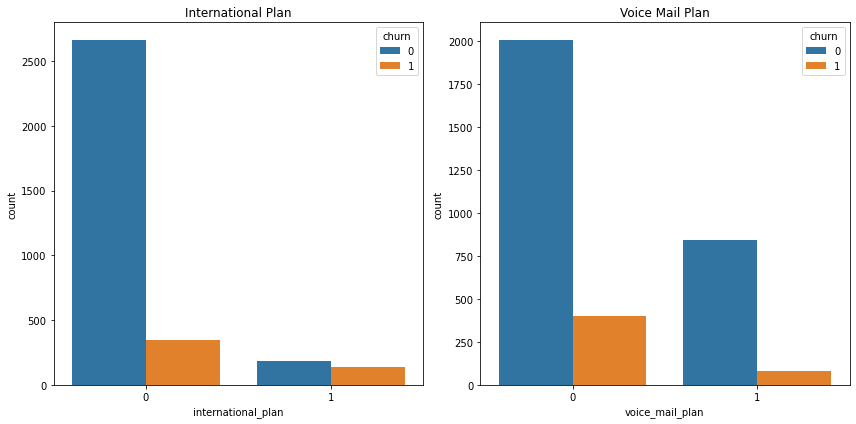

In [13]:
print(df['international_plan'].value_counts(normalize=True))
print()
print(df['voice_mail_plan'].value_counts(normalize=True))


#Performing label encoding
#No becomes 0 and yes becomes 1.
df['international_plan'] = encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = encoder.fit_transform(df['voice_mail_plan'])

#Histograms
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first count plot
sns.countplot(x='international_plan', hue='churn', data=df, ax=axes[0])
axes[0].set_title('International Plan')

# Plot the second count plot
sns.countplot(x='voice_mail_plan', hue='churn', data=df, ax=axes[1])
axes[1].set_title('Voice Mail Plan')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Numeric Columns
Findings from the ditributions:
- `account_length`: There is a member who has been with the company around twice as long as the 75th percentile of customers.
- `area_code`: This is really a categorical variable. We can label encode this.
- `number_vmail_messages`: 50% of the dataset has zero voice mail messages, which might make sense since 72% of the customers do not have voice mail plans.




In [14]:
df.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


415    1655
510     840
408     838
Name: area_code, dtype: int64


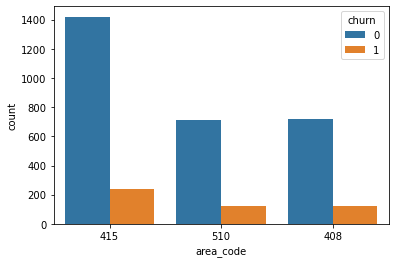

In [15]:
print(df['area_code'].value_counts())

#We should not use label encoding here. This would introduce unintendented ordinalitiy.
#Instead we should perform Onehot encoding, after the train test split.
#Ask how we can make sure our train model includes all possible area codes. (This will be the same for state) 

# # Here we are label encoding. 0 = 408, 1 = 415, 2 = 840
# df['area_code'] = encoder.fit_transform(df['area_code'])
# df['area_code'].value_counts()
sns.countplot(x='area_code', hue='churn', data=df, order=df['area_code'].value_counts().index);


### Correlation Analysis

Looking at the heatmap below, its clear that charge and minutes are perfectly correlated, which makes sense if the company is charging per minute. If we need to, we can confidently drop the 'charge' column from each category; day, eve, night, and intl. We can keep the 'minutes' category as it is unclear what currency metric 'charge' is referring to.

We can also see that minutes and churn are slightly correlated but not significantly enough to provide any meaningful inforamation.

Lastly, as discussed above, there is a near perfect correlation between `number_vmail_messages` and `voice_mail_plan`. This makes sense and these two columns much like 'charge' and 'minutes' are telling us the same thing. We should drop `number_vmail_messages` as this variable is least correlated to churn.

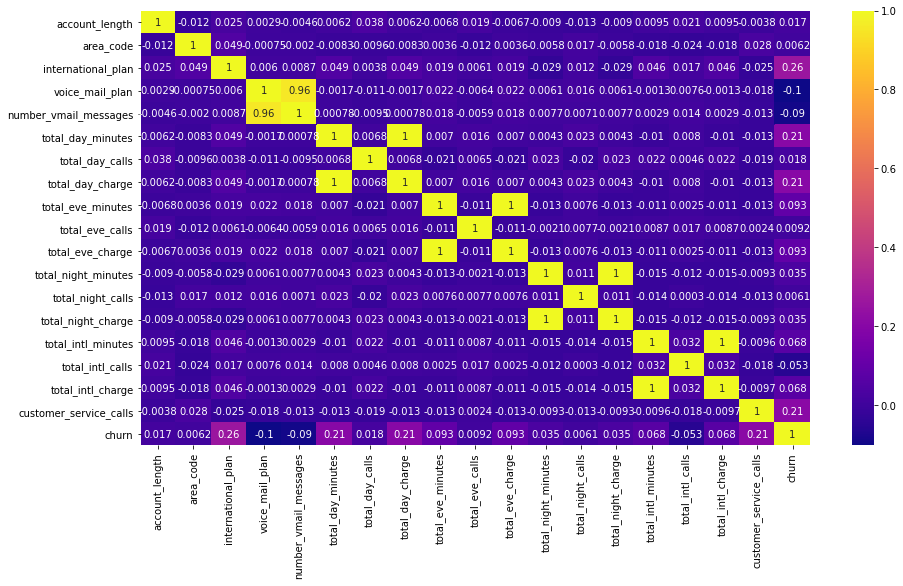

In [16]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(df.select_dtypes('number').corr(),annot=True,cmap='plasma');

### Variance Inflation Factor Analysis

In [17]:
# #This will eventually get deleted and we will move the next line of code up before the VIF analysis.
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = df.drop(['churn','state'], axis = 1)
# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# vif.sort_values('VIF Factor', ascending=False)

In [18]:
#Dropping charge columns
df.drop(labels=['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'],
       axis=1,
       inplace=True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,KS,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [19]:
# X = df.drop(['churn','state'], axis = 1)
# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# vif.sort_values('VIF Factor', ascending=False)

In [20]:
# sns.pairplot(df.select_dtypes('number'), hue = 'churn');

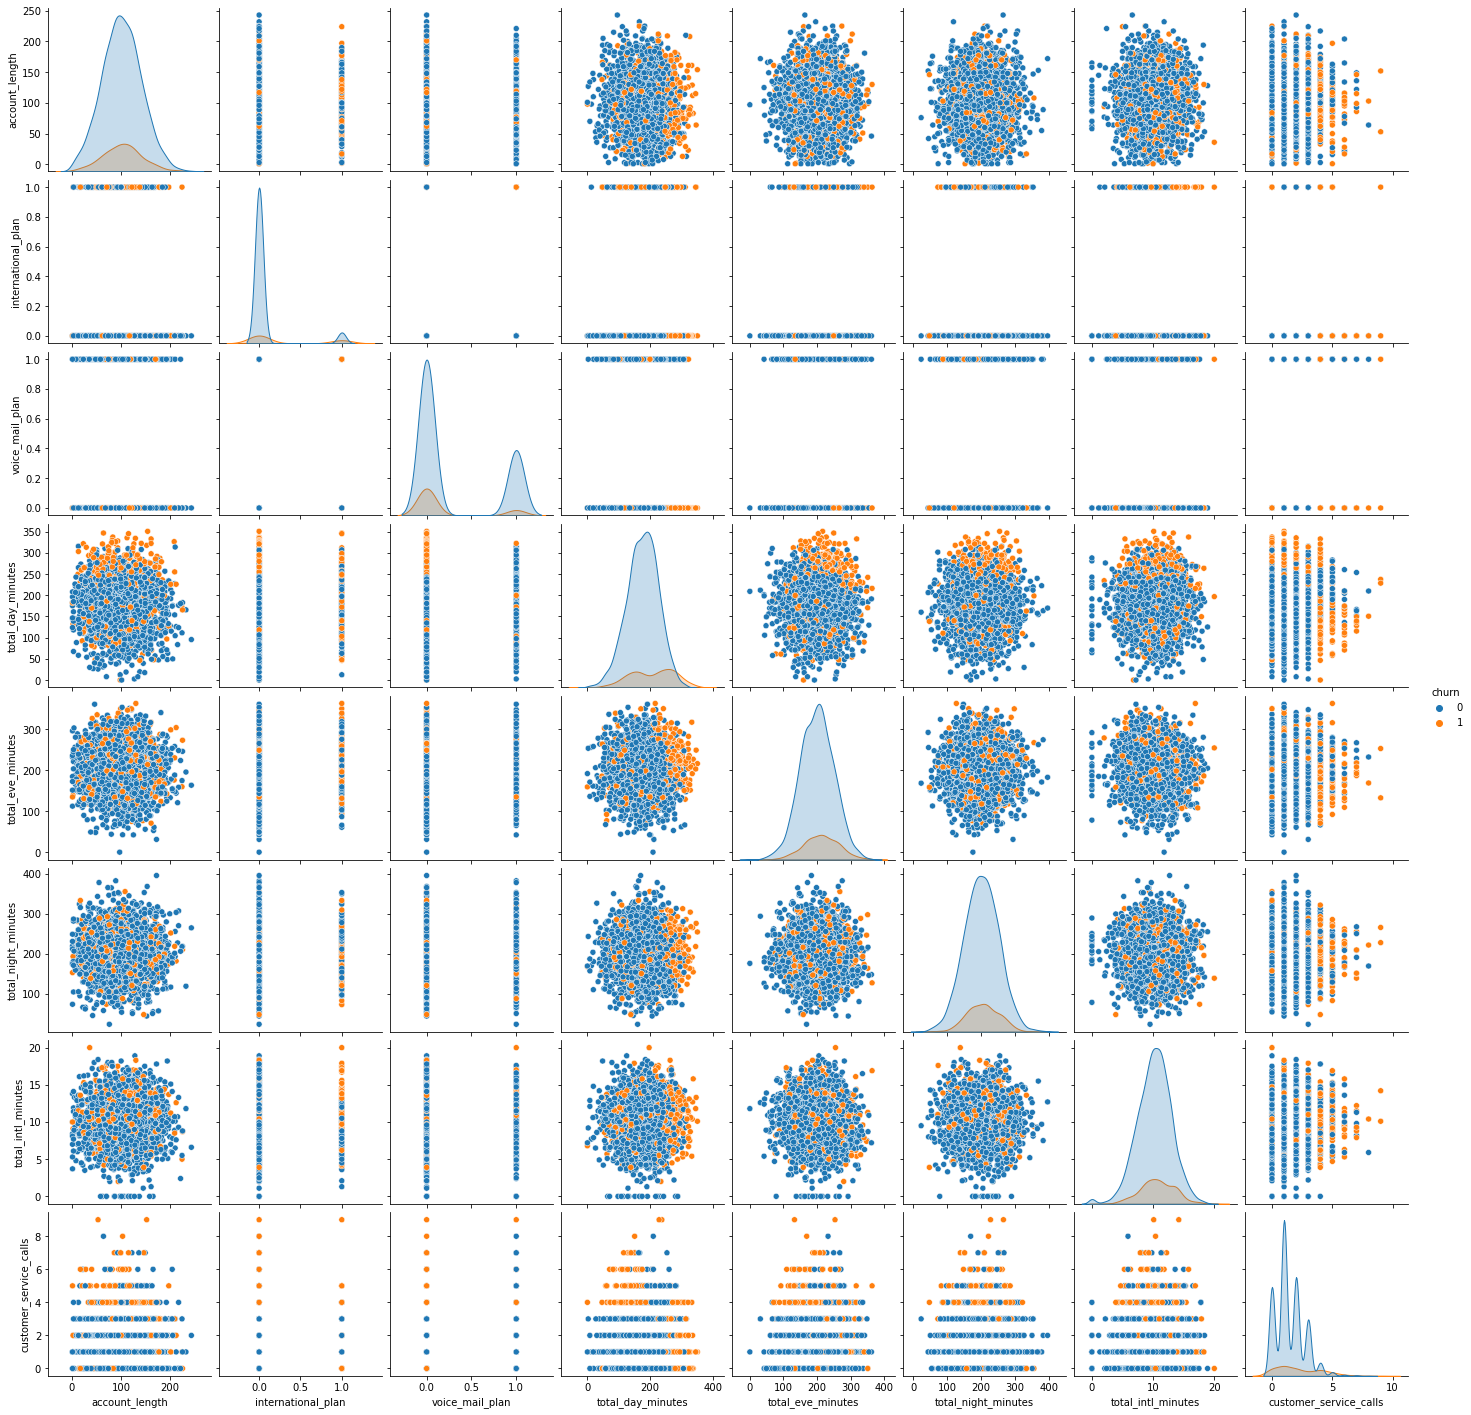

In [21]:
pp_features = df[['account_length', 'international_plan', 'voice_mail_plan', 
                  'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
                 'total_intl_minutes', 'customer_service_calls', 'churn']]

sns.pairplot(pp_features, hue = 'churn');

## 4. Data Preperation

In [22]:
# Define X and y, and split train/test data
df_copy = df.copy()

X = df_copy.drop(columns=['churn'],axis=1)
y = df_copy['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7,stratify=y)

In [23]:
#This is not needed.
# def init_processing(X):
#     '''
#     Initial processing, takes in train and test data.
#     '''
#     # transfrom y/n columns to 1/0
#     #X['international_plan'] = X['international_plan'].map({'yes':1,'no':0})
#     #X['voice_mail_plan'] = X['voice_mail_plan'].map({'yes':1,'no':0})
#     # make 'state' uppercase to eliminate inconsitencies 
#     X['state'] = X['state'].str.upper()
#     # turn `phone_number` into int
#     #X['phone_number'] = X['phone_number'].str.replace('-','').astype(int)
#     return X

# X_train = init_processing(X_train)
# X_train

#### One-Hot Encoding
Here we will convert all of the categorical features into numbers.

In [24]:
# #for X_train
# def encode_and_concat_feature_train(X_train, feature_name):
#     """
#     Helper function for transforming training data.  It takes in the full X dataframe and
#     feature name, makes a one-hot encoder, and returns the encoder as well as the dataframe
#     with that feature transformed into multiple columns of 1s and 0s
#     """
#     # make a one-hot encoder and fit it to the training data
#     ohe = OneHotEncoder(handle_unknown="ignore")
#     single_feature_df = X_train[[feature_name]]
#     #This below is not done for the test.
#     ohe.fit(single_feature_df)
    
#     # call helper function that actually encodes the feature and concats it
#     X_train = encode_and_concat_feature(X_train, feature_name, ohe)
    
#     return ohe, X_train

In [25]:
# # Used for test
# def encode_and_concat_feature(X, feature_name, ohe):
#     """
#     Helper function for transforming a feature into multiple columns of 1s and 0s. Used
#     in both training and testing steps.  Takes in the full X dataframe, feature name, 
#     and encoder, and returns the dataframe with that feature transformed into multiple
#     columns of 1s and 0s
#     """
#     # create new one-hot encoded df based on the feature
#     single_feature_df = X[[feature_name]]
#     feature_array = ohe.transform(single_feature_df).toarray()
#     ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0], index=X.index)
#     #ohe_df = pd.DataFrame(feature_array, columns=ohe.get_feature_names_out(), index=X.index)
#     # drop the old feature from X and concat the new one-hot encoded df
#     X = X.drop(feature_name, axis=1)
#     X = pd.concat([X, ohe_df], axis=1)
    
#     return X

In [26]:
# categorical_feature_names = ["state", 'area_code']



# encoders = {}

# for categorical_feature in categorical_feature_names:
#     ohe,X_train = encode_and_concat_feature_train(X_train, categorical_feature)
#     encoders[categorical_feature] = ohe

In [27]:
# encoders

In [28]:
# X_train

In [29]:
# Tranform 'state' column with OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[['state']]),columns=ohe.get_feature_names_out(['state']),index=X_train.index)
X_train.drop(columns=['state'],axis=1,inplace=True)
X_train = pd.concat([X_train,ohe_df],axis=1)
X_train

,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
2965,103,415,0,0,180.2,134,97.7,85,181.7,134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
692,82,408,0,0,185.8,36,276.5,134,192.1,104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,38,408,0,0,131.2,98,162.9,97,159.0,106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,12,510,1,0,216.7,117,116.5,126,220.0,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2892,103,415,0,1,138.8,80,142.0,108,183.8,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,169,408,0,0,147.2,115,161.9,123,142.1,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2038,136,408,0,0,269.8,106,228.8,101,257.5,106,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3300,111,415,0,1,127.1,94,228.3,116,166.7,108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3313,127,408,0,0,102.8,128,143.7,95,191.4,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Tranform 'area_code' column with OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[['area_code']]),columns=ohe.get_feature_names_out(['area_code']),index=X_train.index)
X_train.drop(columns=['area_code'],axis=1,inplace=True)
X_train = pd.concat([X_train,ohe_df],axis=1)
X_train

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510
2965,103,0,0,180.2,134,97.7,85,181.7,134,8.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
692,82,0,0,185.8,36,276.5,134,192.1,104,5.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,38,0,0,131.2,98,162.9,97,159.0,106,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,12,1,0,216.7,117,116.5,126,220.0,110,9.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2892,103,0,1,138.8,80,142.0,108,183.8,77,11.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,169,0,0,147.2,115,161.9,123,142.1,103,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2038,136,0,0,269.8,106,228.8,101,257.5,106,10.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3300,111,0,1,127.1,94,228.3,116,166.7,108,7.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3313,127,0,0,102.8,128,143.7,95,191.4,97,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Baseline Model

In [31]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring = 'recall')
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} recall
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [32]:
base = DummyClassifier(strategy = 'stratified',random_state=42)
base.fit(X_train,y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [33]:
base.score(X_train, y_train)

0.7503001200480192

In [34]:
logreg_model = LogisticRegression(random_state=42,solver='liblinear')
logreg_model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

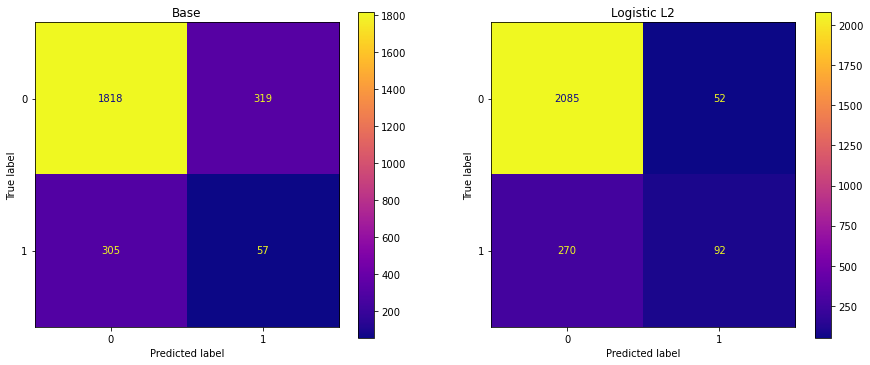

In [35]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].set_title('Base')
ax[1].set_title('Logistic L2')

ConfusionMatrixDisplay.from_estimator(base,X_train,y_train,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_model,X_train,y_train,ax=ax[1],cmap='plasma');

In [36]:
logreg_model_l1 = LogisticRegression(random_state=42,solver='liblinear',penalty='l1')
logreg_model_l1.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

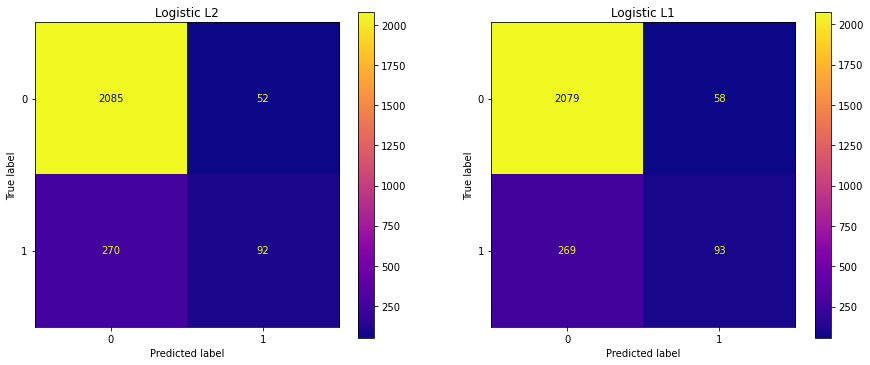

In [37]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].set_title('Logistic L2')
ax[1].set_title('Logistic L1')

ConfusionMatrixDisplay.from_estimator(logreg_model,X_train,y_train,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_model_l1,X_train,y_train,ax=ax[1],cmap='plasma');

### 6. 2nd Model Logistic Regression, Dealing with class imbalance.


In [38]:
# Print original class distribution
print('Original Class Distribution: \n')
print(y_train.value_counts())

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

# Preview new class distribution
print('------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original Class Distribution: 

0    2137
1     362
Name: churn, dtype: int64
------------------------------
Synthetic sample class distribution: 

1    2137
0    2137
Name: churn, dtype: int64


In [39]:
logreg_model_l1_resampling = LogisticRegression(random_state=42,solver='liblinear',penalty='l1')
logreg_model_l1_resampling.fit(X_train_resampled,y_train_resampled)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

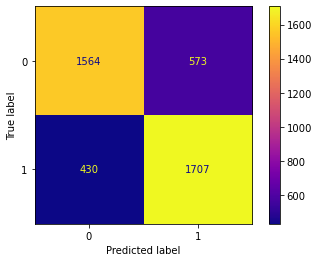

In [40]:
ConfusionMatrixDisplay.from_estimator(logreg_model_l1_resampling,X_train_resampled,y_train_resampled,cmap='plasma');

### Now we create a new model by scaling the previous model to acccount for outliers

This did not help

In [41]:
scaler = StandardScaler()
scaler.fit(X_train_resampled)

StandardScaler()

In [42]:
def scale_values(X, scaler):
    """
    Given a DataFrame and a fitted scaler, use the scaler to scale all of the features
    """
    scaled_array = scaler.transform(X)
    scaled_df = pd.DataFrame(scaled_array, columns=X.columns, index=X.index)
    return scaled_df

In [43]:
X_train_resampled_scale = scale_values(X_train_resampled, scaler)

In [44]:
logreg_model_l1_resampling_scale = LogisticRegression(random_state=42,solver='liblinear',penalty='l1')
logreg_model_l1_resampling_scale.fit(X_train_resampled_scale,y_train_resampled)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

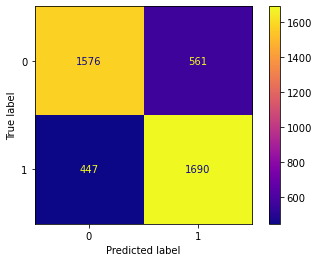

In [45]:
ConfusionMatrixDisplay.from_estimator(logreg_model_l1_resampling_scale,X_train_resampled_scale,y_train_resampled,cmap='plasma');

In [46]:
### Feature Selection

In [47]:
selector = SelectFromModel(logreg_model_l1_resampling)

selector.fit(X_train_resampled, y_train_resampled)

SelectFromModel(estimator=LogisticRegression(penalty='l1', random_state=42,
                                             solver='liblinear'))

In [48]:
sup = selector.get_support()
unique, counts = np.unique(sup, return_counts=True)
print(np.asarray((unique, counts)).T)
#We are only keeping 58 columns


[[ 0  5]
 [ 1 59]]


In [50]:
dict(zip(X_train_resampled.columns, selector.get_support()))

{'account_length': True,
 'international_plan': True,
 'voice_mail_plan': True,
 'total_day_minutes': True,
 'total_day_calls': True,
 'total_eve_minutes': True,
 'total_eve_calls': True,
 'total_night_minutes': True,
 'total_night_calls': True,
 'total_intl_minutes': True,
 'total_intl_calls': True,
 'customer_service_calls': True,
 'state_AL': True,
 'state_AR': False,
 'state_AZ': True,
 'state_CA': True,
 'state_CO': True,
 'state_CT': True,
 'state_DC': True,
 'state_DE': True,
 'state_FL': True,
 'state_GA': True,
 'state_HI': True,
 'state_IA': True,
 'state_ID': True,
 'state_IL': True,
 'state_IN': False,
 'state_KS': True,
 'state_KY': True,
 'state_LA': False,
 'state_MA': True,
 'state_MD': True,
 'state_ME': False,
 'state_MI': True,
 'state_MN': True,
 'state_MO': True,
 'state_MS': True,
 'state_MT': True,
 'state_NC': True,
 'state_ND': True,
 'state_NE': True,
 'state_NH': True,
 'state_NJ': True,
 'state_NM': True,
 'state_NV': True,
 'state_NY': True,
 'state_OH': Tr

In [51]:
def select_important_features(X, selector):
    """
    Given a DataFrame and a selector, use the selector to choose
    the most important columns
    """
    imps = dict(zip(X.columns, selector.get_support()))
    selected_array = selector.transform(X)
    selected_df = pd.DataFrame(selected_array,
                               columns=[col for col in X.columns if imps[col]],
                               index=X.index)
    return selected_df

In [52]:
X_train_selected = select_important_features(X=X_train_resampled, selector=selector)

In [53]:
logreg_sel_model = LogisticRegression(random_state=42,solver='liblinear',penalty='l1')
logreg_sel_model.fit(X_train_selected,y_train_resampled)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

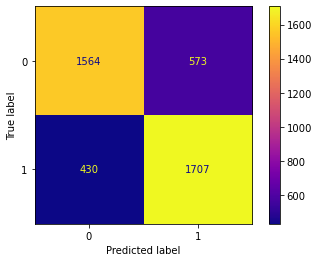

In [54]:
ConfusionMatrixDisplay.from_estimator(logreg_sel_model,X_train_selected,y_train_resampled,cmap='plasma');

In [55]:
base_results = ModelWithCV(
                                        base,
                                        'Base/DummyClassifier',
                                        X_train,
                                        y_train
)
    
logreg2_results = ModelWithCV(
                                        logreg_model,
                                        'L2',
                                        X_train,
                                        y_train
)

logreg1_results = ModelWithCV(
                                        logreg_model_l1,
                                        'L1',
                                        X_train,
                                        y_train
)

logreg1_SMOTE_results = ModelWithCV(
                                        logreg_model_l1_resampling,
                                        'L1_resampling',
                                        X_train_resampled,
                                        y_train_resampled
)

logreg1_SMOTE_scale_results = ModelWithCV(
                                        logreg_model_l1_resampling_scale,
                                        'L1_resampling_scale',
                                        X_train_resampled_scale,
                                        y_train_resampled
)

logreg1_SMOTE_featureselect_results = ModelWithCV(
                                        logreg_sel_model,
                                        'L1_resampling_feature_select',
                                        X_train_selected,
                                        y_train_resampled
)


model_results = [
    base_results,
    logreg2_results,
    logreg1_results,
    logreg1_SMOTE_results,
    logreg1_SMOTE_scale_results,
    logreg1_SMOTE_featureselect_results
]


CV Results for `Base/DummyClassifier` model:
            0.19617 ± 0.03158 recall
        
CV Results for `L2` model:
            0.21832 ± 0.04587 recall
        
CV Results for `L1` model:
            0.23483 ± 0.03574 recall
        
CV Results for `L1_resampling` model:
            0.78428 ± 0.02286 recall
        
CV Results for `L1_resampling_scale` model:
            0.77913 ± 0.02348 recall
        
CV Results for `L1_resampling_feature_select` model:
            0.78615 ± 0.02284 recall
        


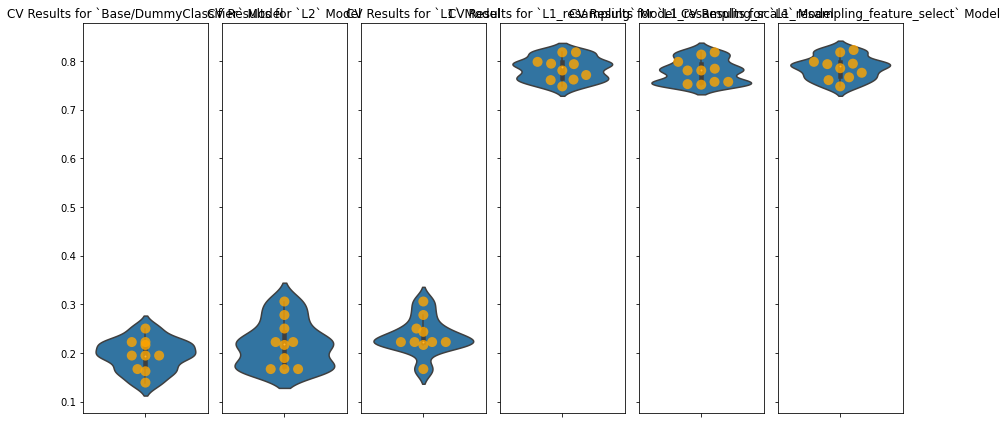

In [56]:
f,axes = plt.subplots(ncols=6, sharey=True, figsize=(12, 6))

for ax, result in zip(axes, model_results):
    ax = result.plot_cv(ax)
    result.print_cv_summary()
plt.tight_layout();
#Now with cross validation, higher tolerance is better.

In [ ]:
def cross_val(model,X,y,kfolds=10):
    
    train_scores = []
    test_scores = []

    for folds in range(2,kfolds):
        cv_results = cross_validate(model,X,y,scoring='recall',return_train_score=True,cv=folds)
        
        cv_train_mean = cv_results['train_score'].mean()
        cv_test_mean = cv_results['test_score'].mean()

        train_scores.append(cv_train_mean)
        test_scores.append(cv_test_mean)

        train_score_mean = np.array(train_scores).mean()
        test_score_mean = np.array(test_scores).mean()


    print('Test score avg: {}'.format(train_score_mean))
    print('Train score avg: {}'.format(test_score_mean))
        

In [ ]:
cross_val(base, X_train, y_train)
#LEast overfitting.

In [ ]:
cross_val(logreg_model, X_train, y_train)
# this is underfitting because the train 

In [ ]:
cross_val(logreg_model_l1, X_train, y_train)

In [ ]:
cross_val(logreg_model_l1_resampling, X_train_resampled, y_train_resampled)

In [ ]:
fig, ax = plt.subplots()

#plot_roc_curve(logreg_model_more_iterations, X_train_imputed, y_train, name='logreg_model_more_iterations', ax=ax)
#plot_roc_curve(logreg_model_higher_tolerance, X_train_imputed, y_train, name='logreg_model_higher_tolerance', ax=ax);

RocCurveDisplay.from_estimator(base, X_train, y_train, 
                name='base/DummyClassifier', ax=ax)
RocCurveDisplay.from_estimator(logreg_model, X_train, y_train, 
               name='logreg_model_L2', ax=ax)
RocCurveDisplay.from_estimator(logreg_model_l1, X_train, y_train, 
               name='logreg_model_L1', ax=ax)
RocCurveDisplay.from_estimator(logreg_model_l1_resampling, X_train_resampled, y_train_resampled, 
               name='logreg_model_L1_resample', ax=ax)
;

#Now area under the curve has more iterations as the better model.

#This doesn't make sense becuase we set accuracy 

#### Scaling: Data Preperation

We will want to scale so that the model isn't overly penalizing the predictors that contain outliers.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
def scale(X, scaler):
    '''
    Takes DataFrame and fitted scaler as input.
    '''
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled,columns=X.columns,index=X.index)
    return X_scaled

In [ ]:
X_train_scaled = scale(X_train,scaler)
X_train_scaled.head()

In [ ]:
logreg_scaled = LogisticRegression(random_state=42)
logreg_scaled.fit(X_train_scaled,y_train)

In [ ]:
ConfusionMatrixDisplay.from_estimator(logreg_scaled,X_train_scaled,y_train,cmap='plasma');